In [246]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
sns.set_style('darkgrid') #seaborn


In [247]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']
train.head(5)


The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [248]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
train['allarea'] = train['1stFlrSF']+train['2ndFlrSF']+train['BsmtFinSF1']
test['allarea'] = test['1stFlrSF']+test['2ndFlrSF']+test['BsmtFinSF1']
#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 81) 
The test data size after dropping Id feature is : (1459, 80) 


## Data Processing

### Outliers (deleting probably wrong data)

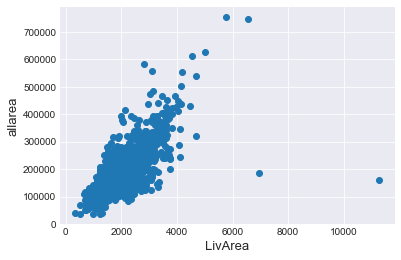

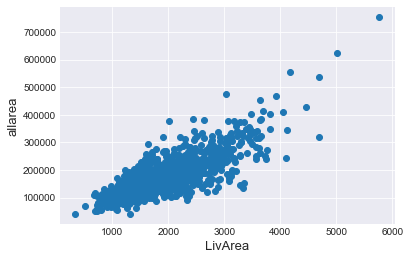


The train data size after dropping Id feature is : (1198, 81) 


In [249]:
fig, ax = plt.subplots()

ax.scatter(x = train['allarea'], y = train['SalePrice'])
plt.ylabel('allarea', fontsize=13)
plt.xlabel('LivArea', fontsize=13)
plt.show()
#only_normal sale condition
def normal_sale(df): #for possibility to change it
    return df.loc[(df['SaleCondition'] == "Normal")]



#train_norm=train.loc[(train['SaleCondition'] == "Normal")]
train_norm = normal_sale(train)
fig, ax = plt.subplots()

ax.scatter(x = train_norm['allarea'], y = train_norm['SalePrice'])
plt.ylabel('allarea', fontsize=13)
plt.xlabel('LivArea', fontsize=13)
plt.show()
print("\nThe train data size after dropping Id feature is : {} ".format(x_norm.shape))

## Target Variable

### SalePrice is the variable we need to predict. So let's do some analysis on this variable first



 mu = 180921.20 and sigma = 79415.29



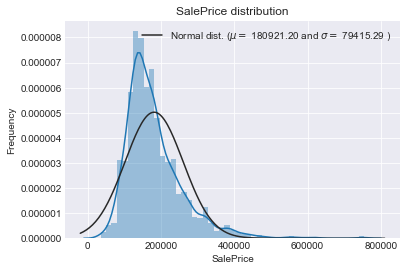

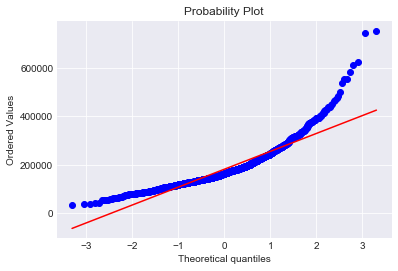

In [250]:
sns.distplot(train['SalePrice'] , fit=norm); #visualisation package

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### The same for normal sale condition



 mu = 175202.22 and sigma = 69684.53



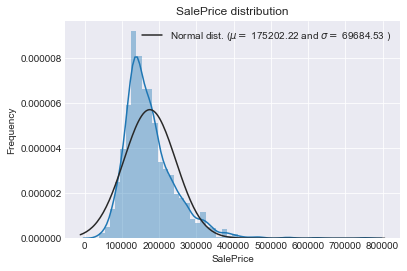

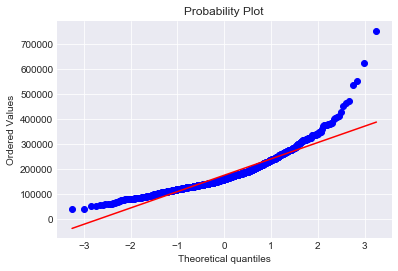

In [251]:
sns.distplot(train_norm['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_norm['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_norm['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

### Log-transformation of the target variable




 mu = 12.02 and sigma = 0.40



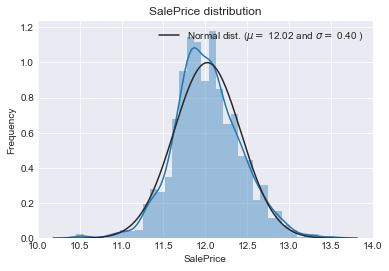

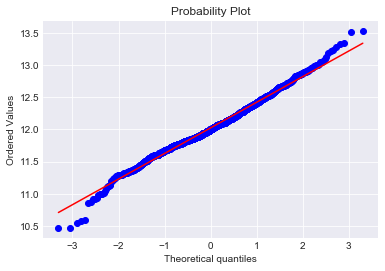

In [252]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"]) # --> ln(1+x) --> well known method for right skewed

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#### The same for normal sale condition


 mu = 12.01 and sigma = 0.37



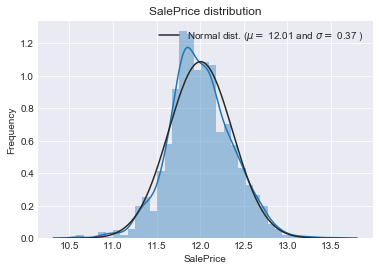

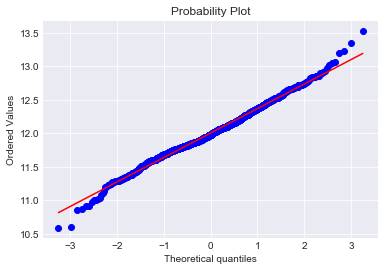

In [253]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_norm["SalePrice"] = np.log1p(train_norm["SalePrice"])

#Check the new distribution 
sns.distplot(train_norm['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_norm['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_norm['SalePrice'], plot=plt)
plt.show()

### Features engineering
let's first concatenate the train and test data in the same dataframe

In [254]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 80)


#### Missing Data

In [255]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657
MiscFeature,96.403
Alley,93.217
Fence,80.439
FireplaceQu,48.647
LotFrontage,16.650
GarageYrBlt,5.447
GarageCond,5.447
GarageFinish,5.447
GarageQual,5.447


#### The same for normal sale condition

In [256]:
all_data_norm = normal_sale(pd.concat((train, test)).reset_index(drop=True))
all_data_norm.drop(['SalePrice'], axis=1, inplace=True)
print("all_data_norm size is : {}".format(all_data_norm.shape))
all_data_norm_na = (all_data_norm.isnull().sum() / len(all_data_norm)) * 100
all_data_norm_na = all_data_norm_na.drop(all_data_norm_na[all_data_norm_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_norm_na})
missing_data.head(20)

all_data_norm size is : (2402, 80)


,Missing Ratio
PoolQC,99.750
MiscFeature,96.003
Alley,93.589
Fence,79.142
FireplaceQu,48.376
LotFrontage,18.609
GarageYrBlt,4.871
GarageFinish,4.871
GarageQual,4.871
GarageCond,4.871


Text(0.5,1,'Percent missing data by feature')

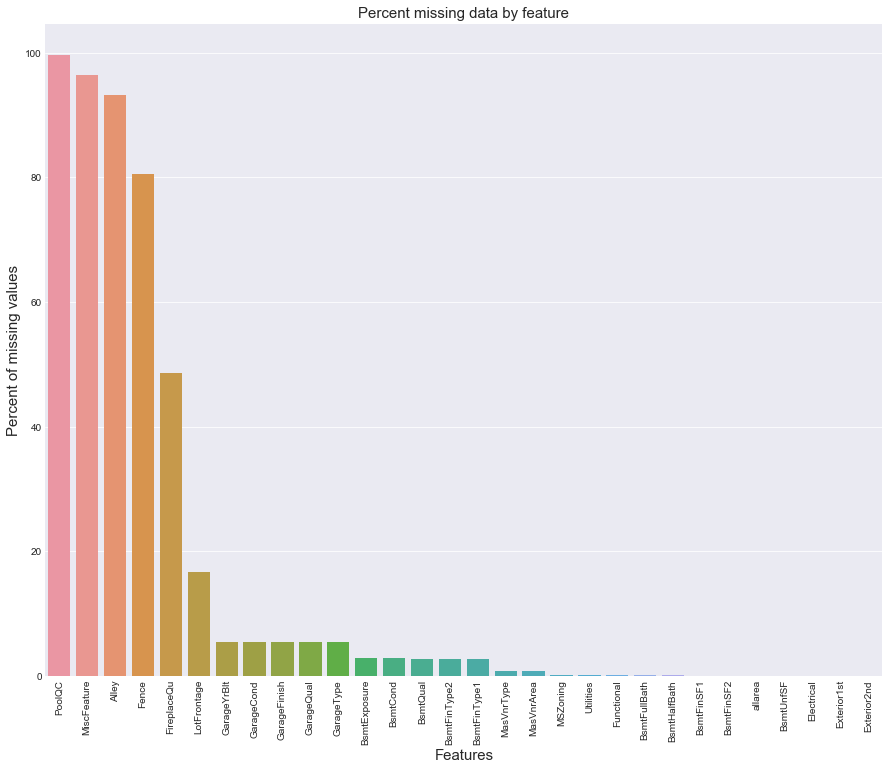

In [257]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

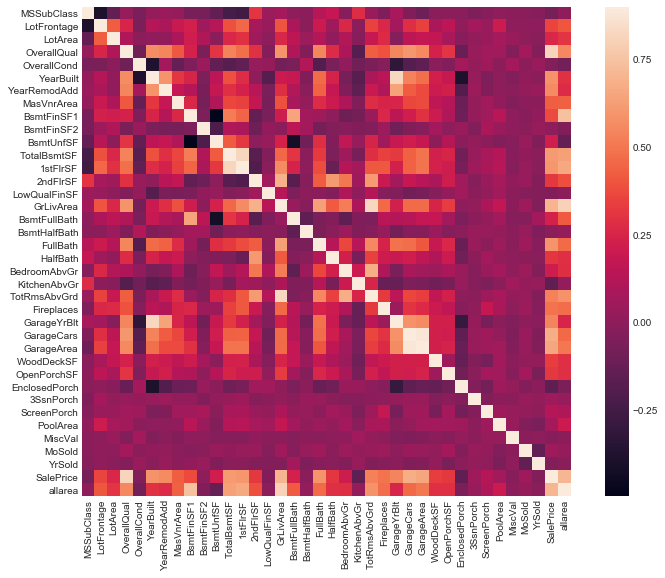

In [258]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

#### normal:

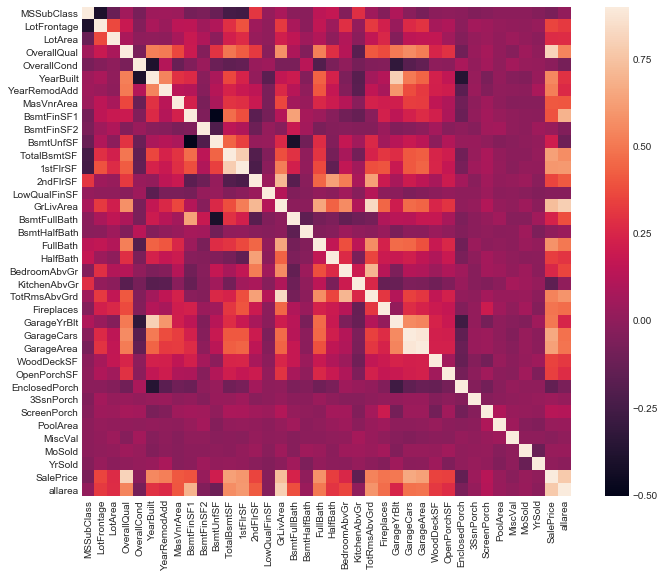

In [259]:
#Correlation map to see how features are correlated with SalePrice
corrmat = normal_sale(train).corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)